<a href="https://colab.research.google.com/github/antoinemarchal/fBms/blob/master/fBms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook fBms

###About this *notebook*
This is a notebook to show you how to install and use [*fBms*](https://github.com/antoinemarchal/fBms). It was built to run on Google Colab but should work on many systems. This [*link*](https://colab.research.google.com/github/antoinemarchal/fBms/blob/master/fBms.ipynb) should find a version of this notebook launched on colab.
This notebook shows how to use [*fBms*](https://github.com/antoinemarchal/fBms), a python package to generate fractal Brownian motion. 
[*marchalib*](https://github.com/antoinemarchal/marchalib) is then used to recover the statistics of the P(k).

####Notebook Authors:
Antoine Marchal


## Installing fBms
[*fBms*](https://github.com/antoinemarchal/fBms) is a code to simulate Fractal Brownian motions

In [1]:
!pip install fBms==0.2.0
!pip install marchalib

     |████████████████████████████████| 5.9MB 9.1MB/s 
     |████████████████████████████████| 15.8MB 339kB/s 
  Using cached https://files.pythonhosted.org/packages/2d/54/592892672429b93b665eb38fa42440834b59b7e2f59cdc6b2804e3d02bda/colorcet-2.0.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/88/f8/fb90087055b1502def9b6e835e80fa548996bf1439a81583e592f388f4c9/pynverse-0.1.4.4.tar.gz
  Created wheel for pynverse: filename=pynverse-0.1.4.4-cp37-none-any.whl size=6349 sha256=a78cbda5b62e9912daeb4811f5beb7a5dfb300cbd4dea42b5d1905296cceea79
  Stored in directory: /root/.cache/pip/wheels/80/ab/86/ec93f37613f012ba3e65c2bbd67e5c54cbc00d237574100c24
Successfully built pynverse


## Getting started with fBms

###Simulated field - two exemples

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import marchalib as ml
from fBms import fBmnd, Pkgen, Pkgen_break

#shape of you cube or map
shape = (512,512)


####fBmnd with Pkgen()

In [3]:
#input parameters fBmnd - n is the spectral index, 
#k0 and k1 is spatial frequency range
n=2.7 
k0=0.008; k1=0.4

#Use Pkgen() to simulate a single power law
field = fBmnd(shape, Pkgen(n,k0,k1), seed=31, unit_length=1)

/usr/local/lib/python3.7/dist-packages/fBms/core.py:72: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-np.power(k0/k,2)) * np.power(k, -n) * np.exp(-np.power(k/k1,2))

/usr/local/lib/python3.7/dist-packages/fBms/core.py:72: RuntimeWarning: divide by zero encountered in power
  return np.exp(-np.power(k0/k,2)) * np.power(k, -n) * np.exp(-np.power(k/k1,2))

/usr/local/lib/python3.7/dist-packages/fBms/core.py:72: RuntimeWarning: invalid value encountered in multiply
  return np.exp(-np.power(k0/k,2)) * np.power(k, -n) * np.exp(-np.power(k/k1,2))



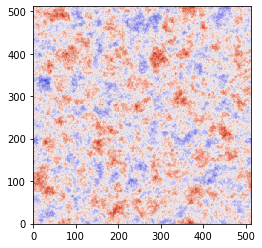

In [4]:
plt.figure()
plt.imshow(field, **ml.imkw_coolwarm)

####fBmnd with Pkgen_break()

In [5]:
#n1 and n2 are spectral indices and kcrit is the frequency of the break
n1=2.; n2=3.6 
k2=0.0; k3=np.inf
kcrit=0.08 

#Use Pkgen_break() to simulate a single power law with a break
field_break = fBmnd(shape, Pkgen_break(n1, n2, kcrit, k2, k3), seed=32, 
                    unit_length=1)

/usr/local/lib/python3.7/dist-packages/fBms/core.py:77: RuntimeWarning: invalid value encountered in true_divide
  return np.where(k < kcrit, np.exp(-np.power(k0/k,2)) * np.power(k/kcrit, -n1) * np.exp(-np.power(k/k1,2)), np.exp(-np.power(k0/k,2)) * np.power(k/kcrit, -n2) * np.exp(-np.power(k/k1,2)))

/usr/local/lib/python3.7/dist-packages/fBms/core.py:77: RuntimeWarning: divide by zero encountered in power
  return np.where(k < kcrit, np.exp(-np.power(k0/k,2)) * np.power(k/kcrit, -n1) * np.exp(-np.power(k/k1,2)), np.exp(-np.power(k0/k,2)) * np.power(k/kcrit, -n2) * np.exp(-np.power(k/k1,2)))



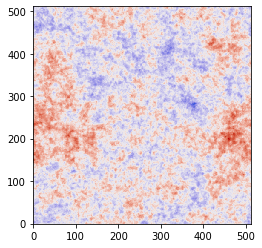

In [6]:
plt.figure()
plt.imshow(field_break, **ml.imkw_coolwarm)

###Recovering the statisics of the P(k)

In [7]:
field_zm = field - np.mean(field)
tapper = ml.edges.apodize(0.87, field_zm.shape)
apod_field = field_zm * tapper

sig_conv = 1.
conv_field = ndimage.filters.gaussian_filter(apod_field, [sig_conv,sig_conv])

ks, sps1d_noconv  = ml.powspec(apod_field)
ks, sps1d  = ml.powspec(conv_field)

beam = ml.gauss_beam(sig_conv,conv_field.shape,FWHM=False)

ks, sps1d_beam = ml.powspec(beam)
sps1d_beam = sps1d_beam/sps1d_beam[0]

####Plot 2D SPS

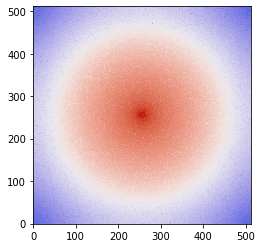

In [8]:
fftfield = np.fft.fft2(conv_field)
shiftfftfield = np.fft.fftshift(fftfield) 
sps2d = np.power(np.abs(shiftfftfield),2) 

plt.figure()
plt.imshow(np.log10(sps2d), **ml.imkw_coolwarm)

####Plot result for field with injection and dissipation 

Text(0, 0.5, '$P(k)$')

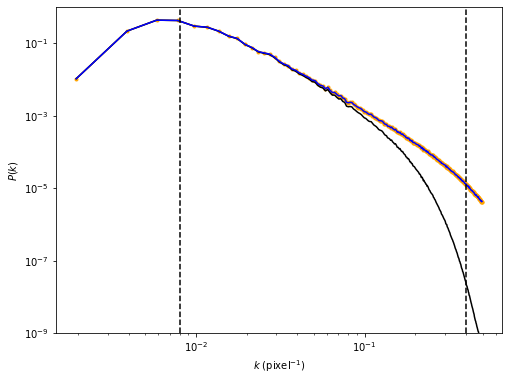

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ks, sps1d_noconv, color='orange', label='Original no conv', marker=".")
plt.plot(ks, sps1d, color='black',label='Original', linewidth=1.5)
plt.plot(ks, sps1d/sps1d_beam, color='blue',label='Corrected', linewidth=1.5)
plt.plot([k0, k0], [1.e-9, 1.], linestyle="--", color="k")
plt.plot([k1, k1], [1.e-9, 1.], linestyle="--", color="k")
plt.ylim([1.e-9, 1.])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k$ (pixel$^{-1}$)")
plt.ylabel(r"$P(k)$")